<h1>Country statistics<h1>

In [25]:
pip install plotly.offline

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement plotly.offline (from versions: none)

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for plotly.offline


In [26]:
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

import csv
import numpy as np
import plotly.express  as  px 
import pandas as pd
import plotly.graph_objects as go



cntr = pd.read_csv("https://raw.githubusercontent.com/esbergenovg/proj/main/data.csv")
cntr['Country'] = cntr['Country'].str.strip().str.replace('\xa0', '')
cntr.head()



,Country,AveragScore,SafetySecurity,PersonelFreedom,Governance,SocialCapital,InvestmentEnvironment,EnterpriseConditions,MarketAccessInfrastructure,EconomicQuality,LivingConditions,Health,Education,NaturalEnvironment
0,Denmark,84.55,92.59,94.09,89.45,82.56,82.42,79.64,78.79,76.81,95.77,81.07,87.48,73.94
1,Sweden,83.67,90.97,91.90,86.41,78.29,82.81,75.54,79.67,76.18,95.33,82.28,85.92,78.74
2,Norway,83.59,93.30,94.10,89.66,79.03,82.24,75.95,75.87,77.25,94.70,82.98,85.68,72.37
3,Finland,83.47,89.56,91.96,90.41,77.27,84.12,77.25,78.77,70.28,94.46,81.19,88.38,77.99
4,Switzerland,83.42,95.66,87.50,87.67,69.14,80.81,83.84,78.65,79.71,94.66,82.11,87.72,73.60


<h2>Выведем немного статистики<h2>

In [27]:
print(cntr['SafetySecurity'].describe())
print(cntr['SafetySecurity'].median())

count    167.000000
mean      67.242515
std       17.542279
min       16.540000
25%       59.290000
50%       68.930000
75%       80.560000
max       96.320000
Name: SafetySecurity, dtype: float64
68.93


In [28]:
print(cntr['PersonelFreedom'].describe())
print(cntr['PersonelFreedom'].median())

count    167.000000
mean      56.829401
std       19.914638
min       16.160000
25%       39.650000
50%       57.170000
75%       72.865000
max       94.100000
Name: PersonelFreedom, dtype: float64
57.17


In [29]:
print(cntr['Governance'].describe())
print(cntr['Governance'].median())

count    167.000000
mean      50.360299
std       17.747092
min       13.090000
25%       37.470000
50%       47.510000
75%       60.965000
max       90.410000
Name: Governance, dtype: float64
47.51


In [30]:
print(cntr['SocialCapital'].describe())
print(cntr['SocialCapital'].median())

count    167.000000
mean      54.468024
std       10.350639
min       23.010000
25%       47.820000
50%       54.390000
75%       60.610000
max       82.560000
Name: SocialCapital, dtype: float64
54.39


In [31]:
print(cntr['InvestmentEnvironment'].describe())
print(cntr['InvestmentEnvironment'].median())

count    167.000000
mean      53.013653
std       16.743723
min       21.690000
25%       40.765000
50%       51.250000
75%       64.640000
max       84.990000
Name: InvestmentEnvironment, dtype: float64
51.25


In [32]:
print(cntr['EnterpriseConditions'].describe())
print(cntr['EnterpriseConditions'].median())

count    167.000000
mean      54.791677
std       12.876166
min       20.500000
25%       45.830000
50%       53.520000
75%       62.760000
max       83.840000
Name: EnterpriseConditions, dtype: float64
53.52


In [33]:
print(cntr['MarketAccessInfrastructure'].describe())
print(cntr['MarketAccessInfrastructure'].median())

count    167.000000
mean      55.019701
std       15.849004
min       24.230000
25%       40.055000
50%       56.590000
75%       69.060000
max       85.750000
Name: MarketAccessInfrastructure, dtype: float64
56.59


In [34]:
print(cntr['EconomicQuality'].describe())
print(cntr['EconomicQuality'].median())

count    167.000000
mean      51.568683
std       13.427811
min       24.460000
25%       41.295000
50%       50.060000
75%       62.555000
max       80.100000
Name: EconomicQuality, dtype: float64
50.06


In [35]:
print(cntr['LivingConditions'].describe())
print(cntr['LivingConditions'].median())

count    167.000000
mean      69.803293
std       19.752677
min       19.210000
25%       55.830000
50%       74.770000
75%       86.975000
max       95.860000
Name: LivingConditions, dtype: float64
74.77


In [36]:
print(cntr['Health'].describe())
print(cntr['Health'].median())

count    167.000000
mean      68.624910
std       11.166266
min       31.950000
25%       60.595000
50%       71.380000
75%       77.340000
max       86.890000
Name: Health, dtype: float64
71.38


In [37]:
print(cntr['Education'].describe())
print(cntr['Education'].median())

count    167.000000
mean      58.723772
std       19.679023
min       16.780000
25%       44.355000
50%       61.930000
75%       74.130000
max       91.440000
Name: Education, dtype: float64
61.93


In [38]:
print(cntr['NaturalEnvironment'].describe())
print(cntr['NaturalEnvironment'].median())

count    167.000000
mean      56.231737
std        9.061262
min       33.670000
25%       50.265000
50%       55.540000
75%       61.940000
max       78.740000
Name: NaturalEnvironment, dtype: float64
55.54


<h2>Во-первых, рассмотрим зависимость между Governance (компетенции руководства?) и SafetySecurity (безопасность) and PersonalFreedom (личными свободами)<h2>

In [39]:
print(cntr['Governance'].corr(cntr['SafetySecurity']))
print(cntr['Governance'].corr(cntr['PersonelFreedom']))
fig = px.scatter(cntr, y = 'SafetySecurity', x = 'PersonelFreedom', hover_name = 'Country', color = 'Governance', size = 'Governance')
fig.show()

0.76255346698305
0.8163122586042961


<h2>На графике очевидна зависимость<h2>

<h2>Далее, посмотрим, как системы образования и здравоохранения влияет на уровень жизни (LivingConditions)<h2>

In [40]:
print(cntr['LivingConditions'].corr(cntr['Health']))
print(cntr['LivingConditions'].corr(cntr['Education']))
fig = px.density_heatmap(cntr, x= 'Health', y='Education', z='LivingConditions', histfunc="avg", text_auto=True)
fig.show()

0.9032194407611616
0.9378221751906275


<h2>Зависимость очевидна<h2>

<h2>Совместим наш датасет с похожим и посмотрим, что там с SafetySecurity в других регионах<h2>

In [41]:
cont = pd.read_csv("https://raw.githubusercontent.com/esbergenovg/proj/main/continents2.csv")
cont.head()

,Country,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN


In [42]:
union = pd.merge(left=cntr, right=cont, how='inner', on='Country')
union.head()


,Country,AveragScore,SafetySecurity,PersonelFreedom,Governance,SocialCapital,InvestmentEnvironment,EnterpriseConditions,MarketAccessInfrastructure,EconomicQuality,...,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Denmark,84.55,92.59,94.09,89.45,82.56,82.42,79.64,78.79,76.81,...,DK,DNK,208,ISO 3166-2:DK,Europe,Northern Europe,NaN,150.0,154.0,NaN
1,Sweden,83.67,90.97,91.90,86.41,78.29,82.81,75.54,79.67,76.18,...,SE,SWE,752,ISO 3166-2:SE,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Norway,83.59,93.30,94.10,89.66,79.03,82.24,75.95,75.87,77.25,...,NO,NOR,578,ISO 3166-2:NO,Europe,Northern Europe,NaN,150.0,154.0,NaN
3,Finland,83.47,89.56,91.96,90.41,77.27,84.12,77.25,78.77,70.28,...,FI,FIN,246,ISO 3166-2:FI,Europe,Northern Europe,NaN,150.0,154.0,NaN
4,Switzerland,83.42,95.66,87.50,87.67,69.14,80.81,83.84,78.65,79.71,...,CH,CHE,756,ISO 3166-2:CH,Europe,Western Europe,NaN,150.0,155.0,NaN


<h2>Найдем среднее значение SafetySecurity разных регионов<h2>

In [43]:
res = union.groupby(['region']).agg({"SafetySecurity":["mean"]})
res.head()

,SafetySecurity
,mean
region,
Africa,57.465510
Americas,64.978519
Asia,64.409773
Europe,84.230526
Oceania,78.580000


In [44]:
colors = ['lightslategray',] * 5
colors[3] = 'crimson'

fig = go.Figure(data=[go.Bar(
    x = res.index.values,
    y = res['SafetySecurity']['mean'].values,
    marker_color=colors
)])
fig.update_layout(title_text='Mean region SafetySecurity')

<h2>Самый высокий показатель в Европе, самый низкий -- в Африке<h2>


<h2>А какой же показатель оказывает самое большое влияние на AverageScore?<h2>

In [45]:
values =[ cntr['AveragScore'].corr(cntr['SafetySecurity']), 
          cntr['AveragScore'].corr(cntr['PersonelFreedom']), 
          cntr['AveragScore'].corr(cntr['Governance']), 
          cntr['AveragScore'].corr(cntr['SocialCapital']),
          cntr['AveragScore'].corr(cntr['InvestmentEnvironment']),
          cntr['AveragScore'].corr(cntr['EnterpriseConditions']),
          cntr['AveragScore'].corr(cntr['MarketAccessInfrastructure']),
          cntr['AveragScore'].corr(cntr['EconomicQuality']),
          cntr['AveragScore'].corr(cntr['LivingConditions']),
          cntr['AveragScore'].corr(cntr['Health']),
          cntr['AveragScore'].corr(cntr['Education']),
          cntr['AveragScore'].corr(cntr['NaturalEnvironment'])
        ]
fig = px.pie(cntr, values=values , labels=cntr.keys(), names=cntr.keys()[2::], color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

<h2>Видно, что MarketAccessInfrastructure является самым важным при подсчете AverageScore<h2>

<h2>Давайте посмотрим, какие будут AverageScore у разных стран<h2>

In [46]:
fig = px.box(cntr, y = 'AveragScore', points = 'all', hover_name = 'Country')
fig.show()

<h2>Видно, что среднее значение примерно равно 47.74-68.87, а медианное -- 57.53.<h2>

In [48]:
geo = pd.read_csv(r"https://raw.githubusercontent.com/esbergenovg/proj/refs/heads/main/world_country_and_usa_states_latitude_and_longitude_values.csv")
geo.head()


,country_code,latitude,longitude,Country,usa_state_code,usa_state_latitude,usa_state_longitude,usa_state
0,AD,42.546245,1.601554,Andorra,AK,63.588753,-154.493062,Alaska
1,AE,23.424076,53.847818,United Arab Emirates,AL,32.318231,-86.902298,Alabama
2,AF,33.939110,67.709953,Afghanistan,AR,35.201050,-91.831833,Arkansas
3,AG,17.060816,-61.796428,Antigua and Barbuda,AZ,34.048928,-111.093731,Arizona
4,AI,18.220554,-63.068615,Anguilla,CA,36.778261,-119.417932,California


<h2>Теперь расположим некоторые страны и их AverageScore на карте.<h2>

<h2>Нам понадобится датасет с долготой и широтой этих стран<h2>

In [ ]:
result =pd.merge(left = cntr, right = geo , how='inner', on= 'Country')
result.head()

,Country,AveragScore,SafetySecurity,PersonelFreedom,Governance,SocialCapital,InvestmentEnvironment,EnterpriseConditions,MarketAccessInfrastructure,EconomicQuality,...,Health,Education,NaturalEnvironment,country_code,latitude,longitude,usa_state_code,usa_state_latitude,usa_state_longitude,usa_state
0,Denmark,84.55,92.59,94.09,89.45,82.56,82.42,79.64,78.79,76.81,...,81.07,87.48,73.94,DK,56.263920,9.501785,NaN,NaN,NaN,NaN
1,Sweden,83.67,90.97,91.90,86.41,78.29,82.81,75.54,79.67,76.18,...,82.28,85.92,78.74,SE,60.128161,18.643501,NaN,NaN,NaN,NaN
2,Norway,83.59,93.30,94.10,89.66,79.03,82.24,75.95,75.87,77.25,...,82.98,85.68,72.37,NO,60.472024,8.468946,NaN,NaN,NaN,NaN
3,Finland,83.47,89.56,91.96,90.41,77.27,84.12,77.25,78.77,70.28,...,81.19,88.38,77.99,FI,61.924110,25.748151,NaN,NaN,NaN,NaN
4,Switzerland,83.42,95.66,87.50,87.67,69.14,80.81,83.84,78.65,79.71,...,82.11,87.72,73.60,CH,46.818188,8.227512,RI,41.580095,-71.477429,Rhode Island


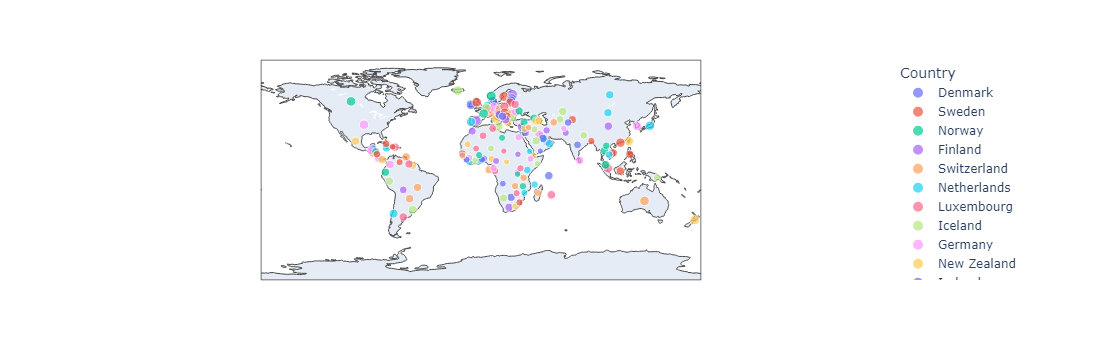

In [ ]:
plot = px.scatter_geo(result, lat='latitude', lon='longitude', color = "Country", size="AveragScore", hover_name = 'Country',size_max = 7) 
plot.show() 

<h2>Вот такая получилась карта<h2>